In [1]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 

df = pd.read_csv("netflix_titles_nov_2019.csv")

## add new features in the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,season_count
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0,
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,2


In [29]:
print(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

This dataset contains 5195 rows and 13 columns


In [31]:
print(f'This dataset contains the following columns: ',df.columns)

This dataset contains the following columns:  Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type', 'year_added'],
      dtype='object')


In [33]:
df = df.drop(['date_added', 'description'], axis=1)
df.head()

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,type,year_added
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",TV Show,2019
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019,TV-G,67 min,"Documentaries, International Movies",Movie,2019
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019,TV-14,135 min,"Comedies, Dramas, International Movies",Movie,2019
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie,2019
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Movie,2019


In [35]:
print(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns now')

This dataset contains 5195 rows and 11 columns now


In [37]:
df.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
type            object
year_added       int32
dtype: object

In [39]:
df.isnull().sum()

show_id            0
title              0
director        1294
cast             511
country          396
release_year       0
rating             9
duration           0
listed_in          0
type               0
year_added         0
dtype: int64

In [41]:
df.isnull().sum()/len(df)*100

show_id          0.000000
title            0.000000
director        24.908566
cast             9.836381
country          7.622714
release_year     0.000000
rating           0.173244
duration         0.000000
listed_in        0.000000
type             0.000000
year_added       0.000000
dtype: float64

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from textblob import TextBlob #used for sentiment analysis
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder



In [51]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


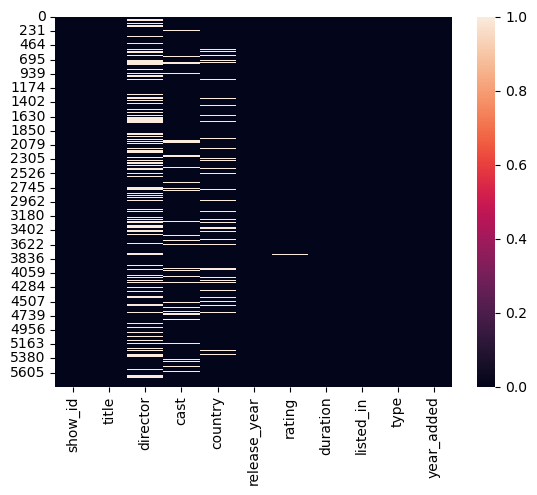

In [53]:
sns.heatmap(df.isnull())
plt.show()

In [55]:
df.dropna(subset= ['duration'], inplace=True)

#Checking the data shape
print(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns now')

This dataset contains 5195 rows and 11 columns now


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5195 entries, 0 to 5836
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5195 non-null   int64 
 1   title         5195 non-null   object
 2   director      3901 non-null   object
 3   cast          4684 non-null   object
 4   country       4799 non-null   object
 5   release_year  5195 non-null   int64 
 6   rating        5186 non-null   object
 7   duration      5195 non-null   object
 8   listed_in     5195 non-null   object
 9   type          5195 non-null   object
 10  year_added    5195 non-null   int32 
dtypes: int32(1), int64(2), object(8)
memory usage: 466.7+ KB


In [59]:
df.dropna(subset= ["director", 'cast'], inplace=True)
df.shape

(3557, 11)

In [61]:
df["country"].fillna(df["country"].mode()[0], inplace=True)
df["rating"].fillna(df["rating"].mode()[0], inplace=True)
df.shape

C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_21484\684765948.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_21484\684765948.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

(3557, 11)

In [63]:
print(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns now')

This dataset contains 3557 rows and 11 columns now


In [65]:
df.isnull().sum()/len(df)*100

show_id         0.0
title           0.0
director        0.0
cast            0.0
country         0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
type            0.0
year_added      0.0
dtype: float64

In [67]:
df.isnull().sum()/len(df)*100

show_id         0.0
title           0.0
director        0.0
cast            0.0
country         0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
type            0.0
year_added      0.0
dtype: float64

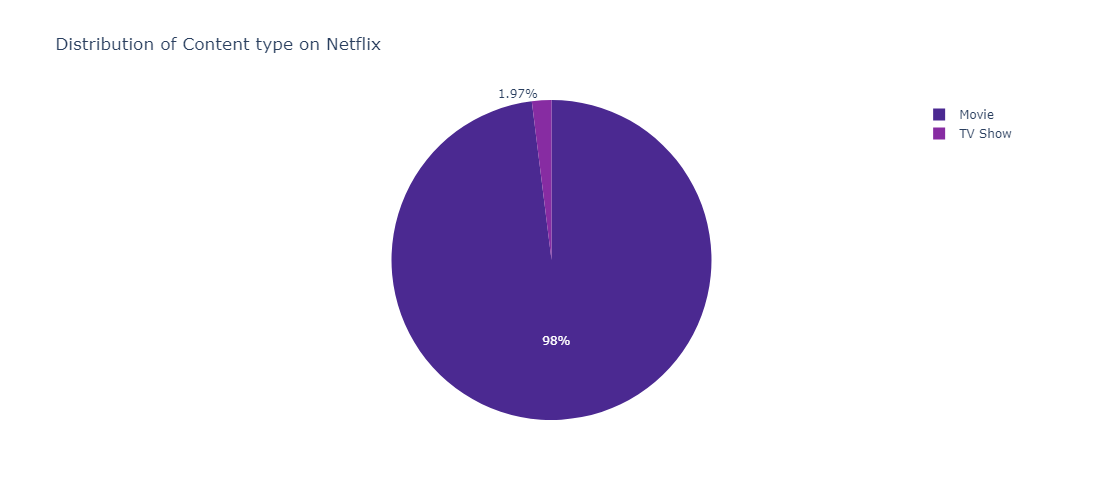

In [69]:
# Distribution of content ratings on Netflix
content_type = df.groupby(['type']).size().reset_index(name='counts')
content_type
# Ploting Distribution of content ratings on Netflix
fig = px.pie(content_type, names = 'type',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of Content type on Netflix',height =  500 , width = 700)
fig.show()

In [71]:
df['country'].value_counts()

country
United States                                          1315
India                                                   628
United Kingdom                                          139
Canada                                                   76
Spain                                                    69
                                                       ... 
Argentina, Chile                                          1
United States, United Kingdom, Italy                      1
Australia, Iraq                                           1
United Arab Emirates, United States, United Kingdom       1
Spain, Mexico, France                                     1
Name: count, Length: 406, dtype: int64

In [87]:
# Get the top 20 countries by number of content
top_countries = df['country'].value_counts().head(20)

# Display the result as a DataFrame
top_countries



country
United States     1907
India              697
United Kingdom     336
Japan              168
Canada             139
South Korea        133
Spain              113
France              85
Mexico              80
Turkey              78
Australia           69
Taiwan              68
Hong Kong           51
Thailand            50
Egypt               49
China               48
Brazil              48
Indonesia           43
Philippines         43
Germany             40
Name: count, dtype: int64

In [89]:
import pandas as pd

# Display as a DataFrame
top_countries_df = pd.DataFrame(top_countries).reset_index()
top_countries_df.columns = ['Country', 'Number of Content']
top_countries_df


,Country,Number of Content
0,United States,1907
1,India,697
2,United Kingdom,336
3,Japan,168
4,Canada,139
5,South Korea,133
6,Spain,113
7,France,85
8,Mexico,80
9,Turkey,78


C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_21484\197920516.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




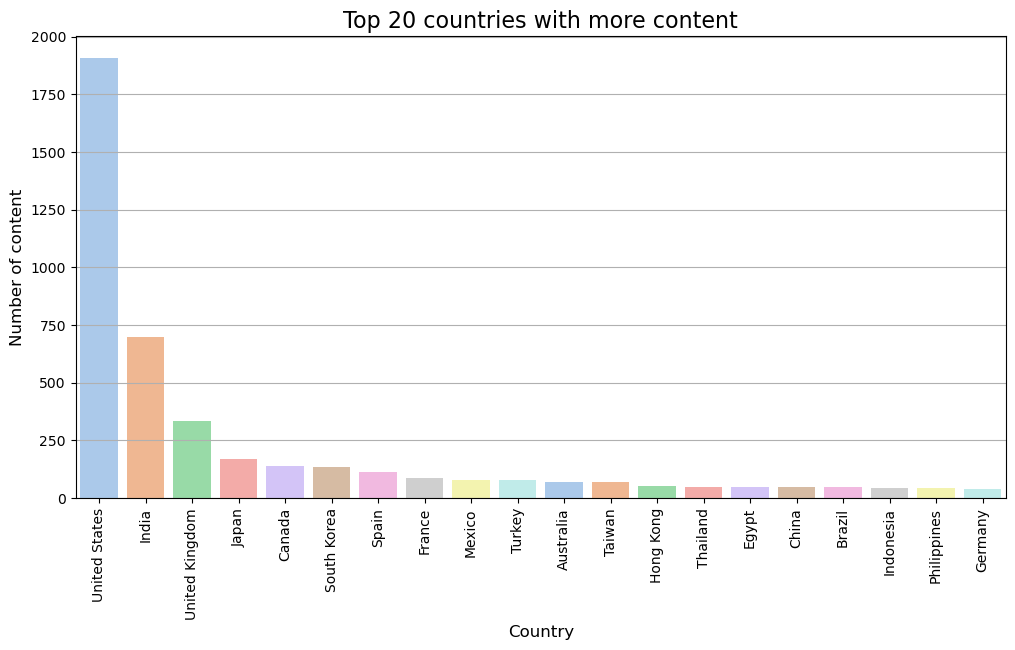

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
# Get the top 20 countries by number of content
top_countries = df['country'].value_counts().head(20)
# Create the bar plot with pastel colors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="pastel")
# Add title and labels
plt.title('Top 20 countries with more content', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of content', fontsize=12)
# Enable grid on y-axis for better readability
plt.grid(True, axis='y')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the plot
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Turkey'),
  Text(10, 0, 'Australia'),
  Text(11, 0, 'Taiwan'),
  Text(12, 0, 'Hong Kong'),
  Text(13, 0, 'Thailand'),
  Text(14, 0, 'Egypt'),
  Text(15, 0, 'China'),
  Text(16, 0, 'Brazil'),
  Text(17, 0, 'Indonesia'),
  Text(18, 0, 'Philippines'),
  Text(19, 0, 'Germany')])

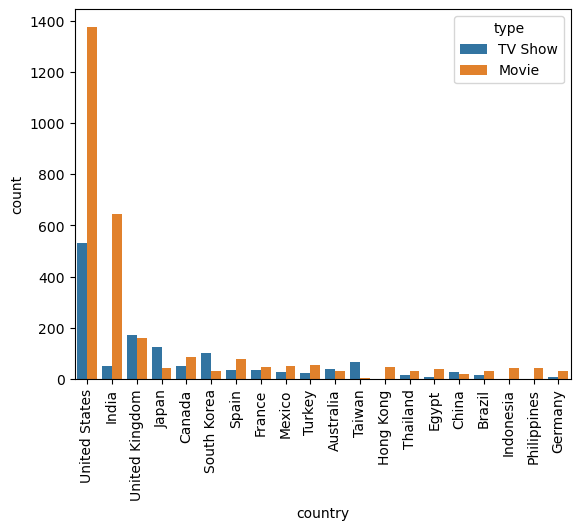

In [101]:
sns.countplot(x = df['country'], order = top_countries.index, hue = df['type'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Turkey'),
  Text(10, 0, 'Australia'),
  Text(11, 0, 'Taiwan'),
  Text(12, 0, 'Hong Kong'),
  Text(13, 0, 'Thailand'),
  Text(14, 0, 'Egypt'),
  Text(15, 0, 'China'),
  Text(16, 0, 'Brazil'),
  Text(17, 0, 'Indonesia'),
  Text(18, 0, 'Philippines'),
  Text(19, 0, 'Germany')])

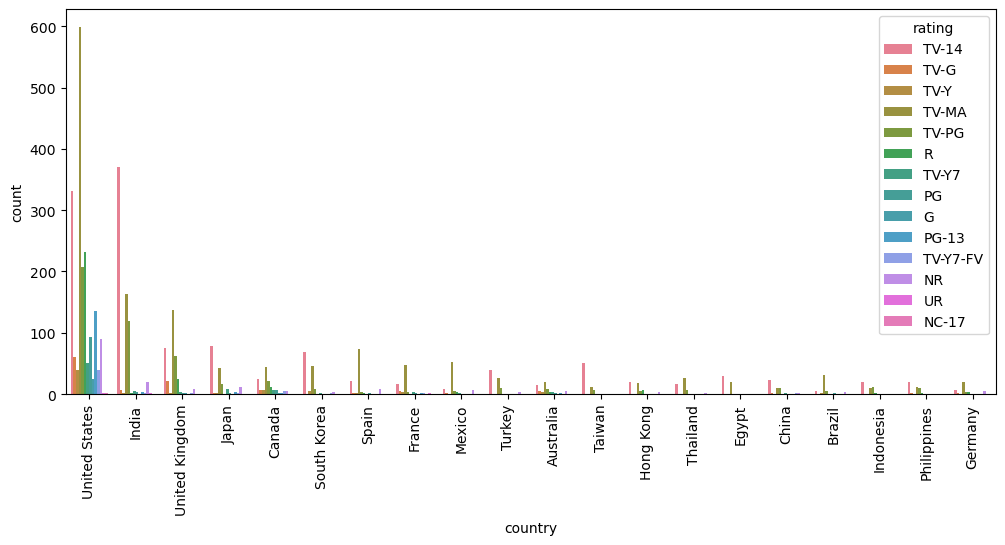

In [103]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['country'], order = top_countries.index, hue =df['rating'] )
plt.xticks(rotation=90)

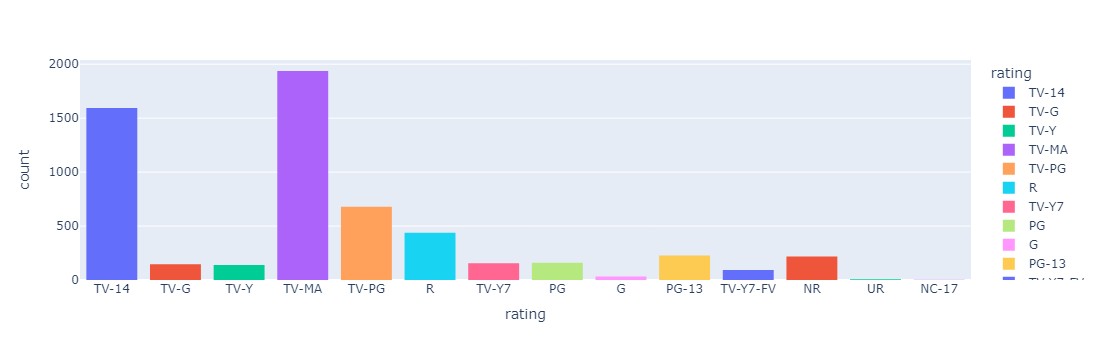

In [105]:
fig = px.histogram(df, x="rating", color="rating")
fig.update_layout(
    bargap=0.2
)
fig.show()

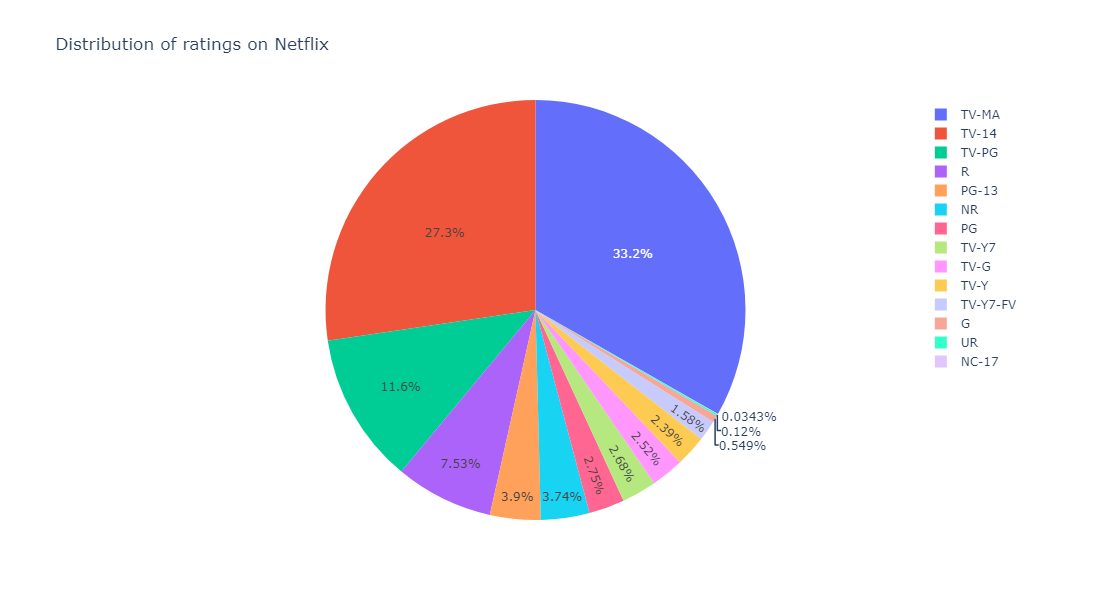

In [107]:
#Ratings
ratings = df.groupby(['rating']).size().reset_index(name='counts')
ratings
# Ploting Distribution of content ratings on Netflix
fig = px.pie(ratings, names = 'rating',values = 'counts',
             title = 'Distribution of ratings on Netflix',height =  600 , width = 600)
fig.show()

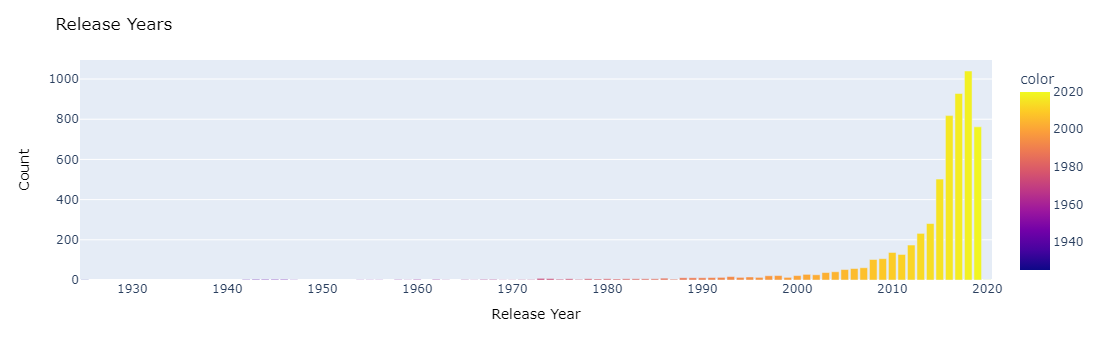

In [109]:
fig = px.bar(x=df["release_year"].value_counts().index, 
             y=df["release_year"].value_counts().values, 
             color=df["release_year"].value_counts().index)

# Update layout with customized title, axis labels, and background colors

fig.update_layout(
    title={
        'text': "Release Years",
        'font': {'color': 'black'}
    },
    xaxis_title={
        'text': "Release Year",
        'font': {'color': 'black'}
    },
    yaxis_title={
        'text': "Count",
        'font': {'color': 'black'}
    },
          
)

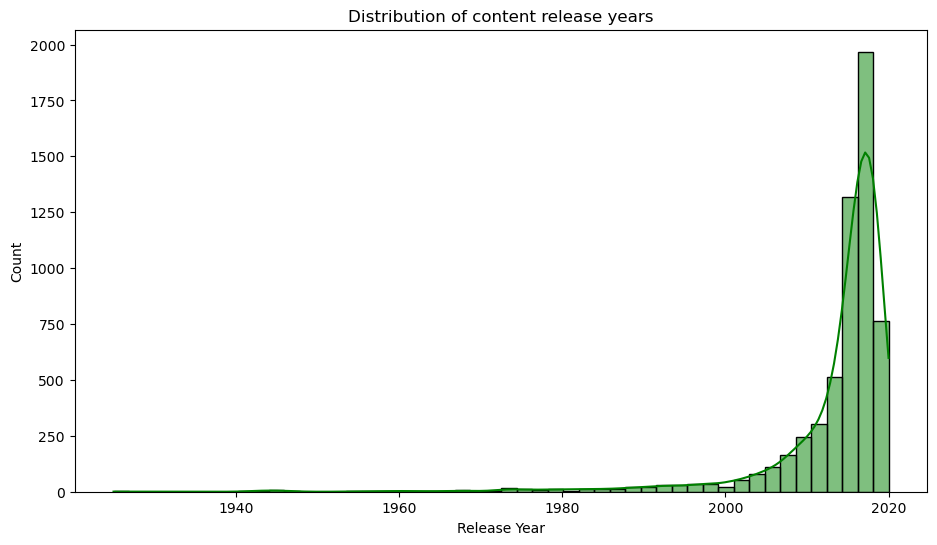

In [111]:
plt.figure(figsize=(11, 6))
sns.histplot(df['release_year'], bins=50, kde=True, color='green')
plt.title('Distribution of content release years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

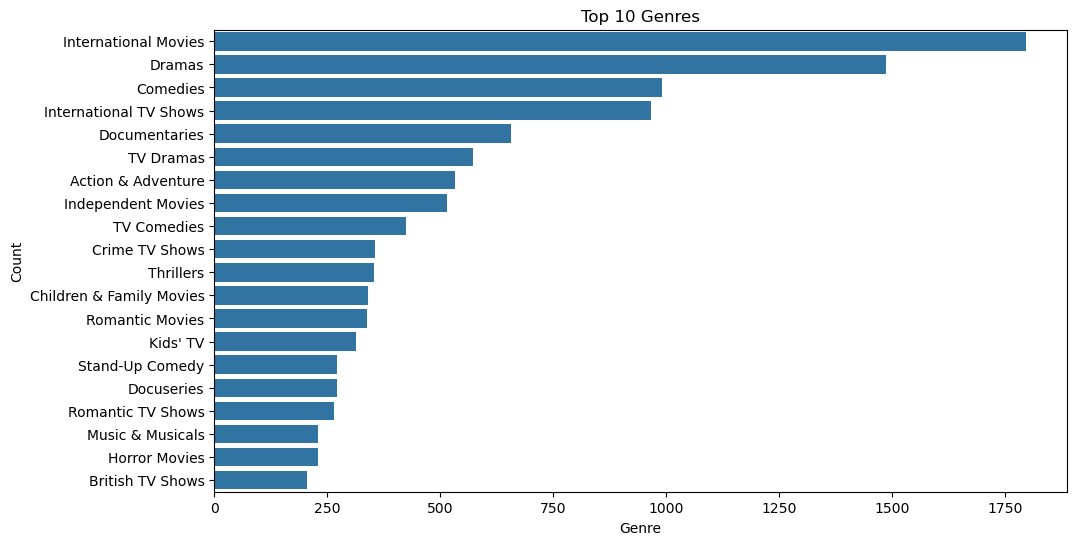

In [113]:
#let's listed in conlumns
plt.figure(figsize=(11, 6))
df['listed_in'] = df['listed_in'].str.split(', ')
genres = df['listed_in'].explode().value_counts().head(20)
sns.barplot(x=genres.values, y=genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show

In [115]:
# Filter the dataset to include only movies
movie_df = df[df['type'] == 'Movie']

# Handle missing values in the duration column
movie_df['duration'] = movie_df['duration'].str.replace(' min', '')

# Convert the duration column to integer
movie_df['duration'] = movie_df['duration'].astype(int)

C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_21484\351166090.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_21484\351166090.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



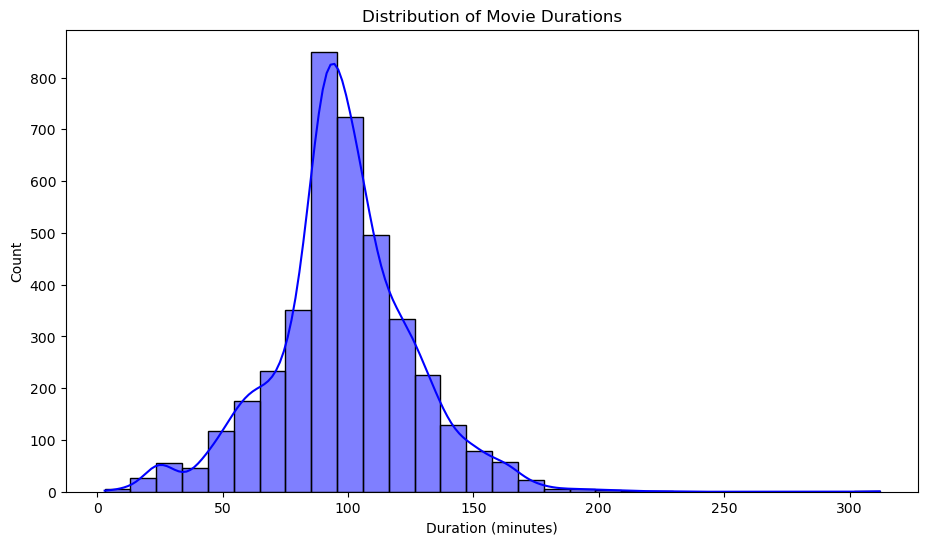

In [117]:
# Distribution of movie durations
plt.figure(figsize=(11, 6))
sns.histplot(movie_df['duration'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

In [119]:
# Filter the dataset to include only TV Shows
tv_df = df[df['type'] == 'TV Show']

# Replace ' Seasons' and ' Season' and convert the column to integers
tv_df['duration'] = tv_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '')

# Ensure that the duration column can be converted to integers and handle potential conversion issues
tv_df['duration'] = tv_df['duration'].apply(lambda x: int(x) if x.isdigit() else None)


# Convert the duration column to integer type
tv_df['duration'] = tv_df['duration'].astype(int)

C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_21484\977633471.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_21484\977633471.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_21484\977633471.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

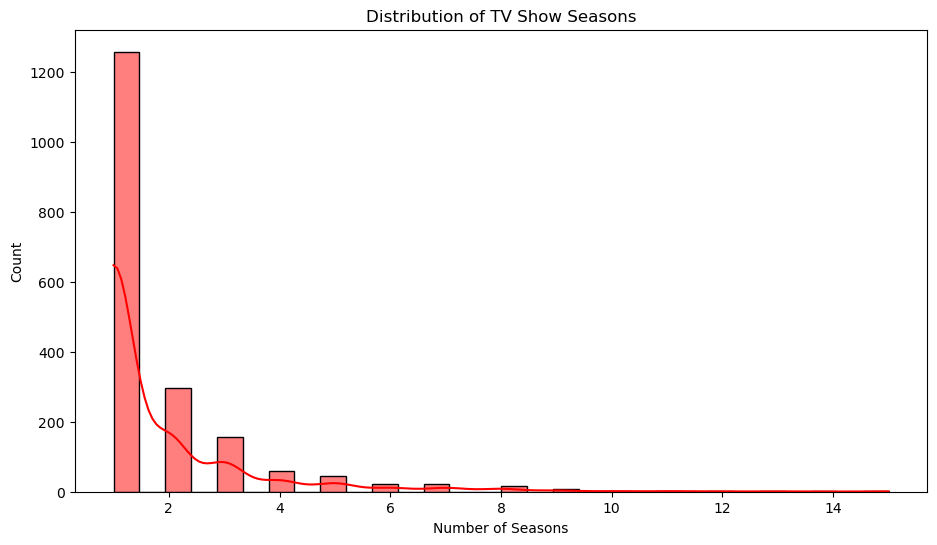

In [121]:
# Distribution of TV show seasons
plt.figure(figsize=(11, 6))
sns.histplot(tv_df['duration'], bins=30, kde=True, color='red')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

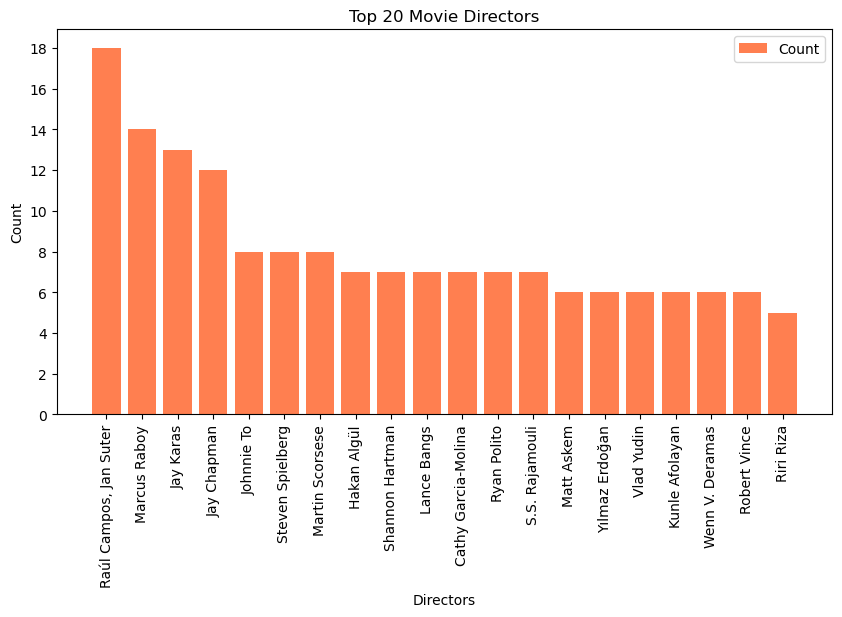

In [125]:

import numpy as np
top_10_directors_movie = df['director'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:20].reset_index()
top_10_directors_movie
plt.figure(figsize=(10,5))
plt.bar(top_10_directors_movie['director'],top_10_directors_movie['count'], color = "coral" , label='Count')
plt.title('Top 20 Movie Directors')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,20,2))
plt.legend()
plt.show()

In [127]:
string_columns = df.select_dtypes(include=('object')).columns
string_columns

Index(['title', 'director', 'cast', 'country', 'date_added', 'rating',
       'duration', 'listed_in', 'description', 'type'],
      dtype='object')

In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in string_columns:
    df[col] = le.fit_transform(df[col].astype('str'))

In [131]:
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,986,3099,1699,314,868,2019,6,0,344,1838,1
1,81197050,1857,1730,938,527,868,2019,7,158,261,2547,0
2,81213894,5217,24,4429,186,868,2019,6,43,184,337,0
3,81082007,417,1877,3039,148,862,2019,6,9,287,1578,0
4,80213643,984,3099,46,65,1092,2019,10,100,14,3430,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,2844,1306,3504,426,793,1987,2,177,251,4501,0
5833,70127998,4310,1322,1015,426,827,2009,6,115,326,1104,0
5834,70084180,2385,2133,329,104,777,2007,2,7,301,5426,0
5835,70157452,1293,3099,5078,426,344,2007,8,0,410,2959,1


In [133]:
df["duration"].unique()

array([  0, 158,  43,   9, 100,  10, 174,  23,  15,   7, 187, 188,  31,
        45,  42, 160, 105, 179, 110, 135,  22, 180, 186,  19,  28,  12,
       190, 191, 146,  24, 116, 172,  46,  16, 181, 165,  21, 178,   5,
         4, 114,   6,  39,  78,   8, 175, 177,  17, 182,  44,  36,  70,
       170,   3, 166, 151,  53, 192, 144, 149, 189, 139, 152, 128,  30,
       133, 159, 193, 185, 129, 184,  11, 102,  41,  20, 145,  65,  92,
        34,  27,  47,  29, 125,  51, 156,  33, 154,  49, 101, 150, 142,
       176, 157,  50, 107, 153,  63,  66, 162, 168, 169, 134,  57, 148,
       155,  32, 171,  75, 131, 127,  56,  38,  64,  91,  83, 173,  69,
       161, 183,  52,   2,  35,  59,  18, 136,  79, 164,  55,  76,  13,
        87, 147,  73, 121, 143, 112, 137,  86,  61,  60, 163,  26, 117,
       118,  71,  62,  77,  48,  58, 138,  80,  82,  40, 167,  74, 141,
       140,  54,  37, 123, 115, 120, 113, 124,  67, 109,  14, 104,  95,
       111, 106,  68, 119,  99, 122, 103,  72,  94,  81,  85,  9

In [135]:
x = df.drop(['type'], axis='columns')
y = df[['type']]

In [137]:
x

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81193313,986,3099,1699,314,868,2019,6,0,344,1838
1,81197050,1857,1730,938,527,868,2019,7,158,261,2547
2,81213894,5217,24,4429,186,868,2019,6,43,184,337
3,81082007,417,1877,3039,148,862,2019,6,9,287,1578
4,80213643,984,3099,46,65,1092,2019,10,100,14,3430
...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,2844,1306,3504,426,793,1987,2,177,251,4501
5833,70127998,4310,1322,1015,426,827,2009,6,115,326,1104
5834,70084180,2385,2133,329,104,777,2007,2,7,301,5426
5835,70157452,1293,3099,5078,426,344,2007,8,0,410,2959


In [139]:
y

,type
0,1
1,0
2,0
3,0
4,1
...,...
5832,0
5833,0
5834,0
5835,1


In [142]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.41064853, -1.14527994,  1.00176864, ..., -1.10320423,
         0.87706213, -0.63822687],
       [ 0.41104277, -0.62324388, -0.3344189 , ...,  0.95791404,
         0.17360642, -0.21696751],
       [ 0.41281976,  1.39058065, -1.99952915, ..., -0.54226698,
        -0.47899707, -1.53006087],
       ...,
       [-0.76132885, -0.30678574,  0.05892192, ..., -1.01188887,
         0.51262122,  1.49361883],
       [-0.75359889, -0.96127871,  1.00176864, ..., -1.10320423,
         1.43643655,  0.02782637],
       [-0.76457477,  1.42833986,  0.62794846, ...,  1.16663488,
         0.44481826,  1.60710337]])

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [146]:
len(X_train)

4669

In [148]:
len(X_test)

1168

In [150]:
len(Y_train)

NameError: name 'Y_train' is not defined